In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [38]:
import numpy as np
import pickle
import pandas as pd
import sklearn as skl
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from math import *
from sklearn.preprocessing import OneHotEncoder

KMeans Clustering for Complete IPL Dataset (2008 - 2022)

In [6]:
df = pd.read_csv("/content/ipl_dataset.csv")


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.head

<bound method NDFrame.head of                                         full_scorecard  \
0    https://stats.espncricinfo.com/ci/engine/match...   
1    https://stats.espncricinfo.com/ci/engine/match...   
2    https://stats.espncricinfo.com/ci/engine/match...   
3    https://stats.espncricinfo.com/ci/engine/match...   
4    https://stats.espncricinfo.com/ci/engine/match...   
..                                                 ...   
953  https://stats.espncricinfo.com/ci/engine/match...   
954  https://stats.espncricinfo.com/ci/engine/match...   
955  https://stats.espncricinfo.com/ci/engine/match...   
956  https://stats.espncricinfo.com/ci/engine/match...   
957  https://stats.espncricinfo.com/ci/engine/match...   

                           team1                  team2  team1_score  \
0            Chennai Super Kings  Kolkata Knight Riders        131.0   
1                 Mumbai Indians         Delhi Capitals        177.0   
2    Royal Challengers Bangalore           Punjab Kings  

In [9]:
df.shape

(958, 12)

Matplot

array([[<AxesSubplot:title={'center':'team1_score'}>]], dtype=object)

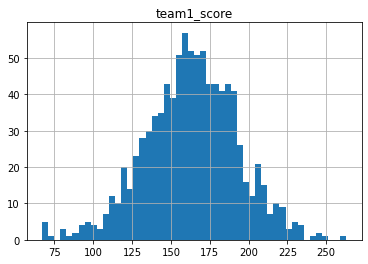

In [13]:
df.hist(column='team1_score', bins=50)

array([[<AxesSubplot:title={'center':'team2_score'}>]], dtype=object)

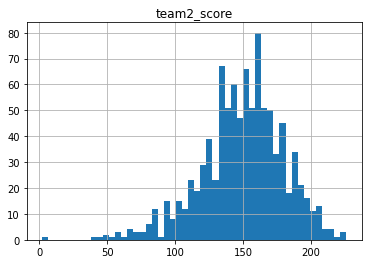

In [16]:
df.hist(column='team2_score', bins=50)

Exploratory data analysis

In [45]:
def expand_categories (values):
    result = []
    s = values.value_counts() 
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v, round(100*(s[v]/t),2))) 
    return "[{}]".format(",".join(result))

def analyze (df):
    cols = df.columns.values 
    total = float(len(df))
    for col in cols:
        uniques=df[col].unique() 
        unique_count = len(uniques)
        if unique_count>100:
            print("===> {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("===> {}:{}".format(col, expand_categories (df[col]))) 
            expand_categories (df[col])

In [46]:
analyze(df)

===> full_scorecard:958 (100%)
===> team1:[Mumbai Indians:12.94%,Royal Challengers Bangalore:12.0%,Chennai Super Kings:11.9%,Kolkata Knight Riders:11.06%,Kings XI Punjab:10.13%,Rajasthan Royals:9.5%,Sunrisers Hyderabad:8.04%,Delhi Daredevils:7.62%,Deccan Chargers:4.49%,Delhi Capitals:3.03%,Pune Warriors:2.09%,Punjab Kings:1.88%,Gujarat Lions:1.46%,Lucknow Super Giants:0.84%,Rising Pune Supergiant:0.84%,Gujarat Titans:0.73%,Rising Pune Supergiants:0.73%,Kochi Tuskers Kerala:0.73%]
===> team2:[Kolkata Knight Riders:12.42%,Royal Challengers Bangalore:11.9%,Mumbai Indians:11.27%,Rajasthan Royals:10.54%,Chennai Super Kings:9.92%,Kings XI Punjab:9.71%,Delhi Daredevils:9.29%,Sunrisers Hyderabad:7.83%,Delhi Capitals:3.55%,Deccan Chargers:3.34%,Pune Warriors:2.71%,Gujarat Lions:1.67%,Punjab Kings:1.04%,Gujarat Titans:0.94%,Rising Pune Supergiant:0.84%,Lucknow Super Giants:0.73%,Rising Pune Supergiants:0.73%,Kochi Tuskers Kerala:0.73%]
===> team1_score:150 (15%)
===> team2_score:149 (15%)
===> t

Checking Null Values

In [47]:
df.isna().sum().sum()

154

In [48]:
df.isnull().sum()

full_scorecard       0
team1                0
team2                8
team1_score         28
team2_score         10
toss_winner          8
toss_choice          0
winner               0
margin               0
man_of_the_match     8
stadium              8
place               84
dtype: int64

Filling missing values with 0

In [49]:
new_df = df.fillna(0)
new_df

,full_scorecard,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,https://stats.espncricinfo.com/ci/engine/match...,Chennai Super Kings,Kolkata Knight Riders,131.0,133.0,Kolkata Knight Riders,Field,KKR,6 wickets,Umesh Yadav,Wankhede Stadium,Mumbai
1,https://stats.espncricinfo.com/ci/engine/match...,Mumbai Indians,Delhi Capitals,177.0,179.0,Delhi Capitals,Field,Capitals,4 wickets,Kuldeep Yadav,Brabourne Stadium,Mumbai
2,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Punjab Kings,205.0,208.0,Punjab Kings,Field,Punjab,5 wickets,Odean Smith,Dr DY Patil Sports Academy,Mumbai
3,https://stats.espncricinfo.com/ci/engine/match...,Lucknow Super Giants,Gujarat Titans,158.0,161.0,Gujarat Titans,Field,Titans,5 wickets,Mohammed Shami,Wankhede Stadium,Mumbai
4,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Sunrisers Hyderabad,210.0,149.0,Sunrisers Hyderabad,Field,Royals,61 runs,Sanju Samson,Maharashtra Cricket Association Stadium,Pune
...,...,...,...,...,...,...,...,...,...,...,...,...
953,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Mumbai Indians,0.0,126.0,Mumbai Indians,Field,Mumbai,9 wickets,Dilhara Fernando,M Chinnaswamy Stadium,Bangalore
954,https://stats.espncricinfo.com/ci/engine/match...,Kings XI Punjab,Rajasthan Royals,221.0,180.0,Rajasthan Royals,Field,Kings,41 runs,Shaun Marsh,Punjab Cricket Association Stadium,Mohali
955,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Delhi Daredevils,192.0,87.0,Delhi Daredevils,Field,Royals,105 runs,Shane Watson,Wankhede Stadium,Mumbai
956,https://stats.espncricinfo.com/ci/engine/match...,Kings XI Punjab,Chennai Super Kings,112.0,116.0,Kings XI Punjab,Bat,Super,9 wickets,Makhaya Ntini,Wankhede Stadium,Mumbai


Filling NaN values with forward fill value

In [50]:
new_df = df.fillna(method="ffill")
new_df

,full_scorecard,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,https://stats.espncricinfo.com/ci/engine/match...,Chennai Super Kings,Kolkata Knight Riders,131.0,133.0,Kolkata Knight Riders,Field,KKR,6 wickets,Umesh Yadav,Wankhede Stadium,Mumbai
1,https://stats.espncricinfo.com/ci/engine/match...,Mumbai Indians,Delhi Capitals,177.0,179.0,Delhi Capitals,Field,Capitals,4 wickets,Kuldeep Yadav,Brabourne Stadium,Mumbai
2,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Punjab Kings,205.0,208.0,Punjab Kings,Field,Punjab,5 wickets,Odean Smith,Dr DY Patil Sports Academy,Mumbai
3,https://stats.espncricinfo.com/ci/engine/match...,Lucknow Super Giants,Gujarat Titans,158.0,161.0,Gujarat Titans,Field,Titans,5 wickets,Mohammed Shami,Wankhede Stadium,Mumbai
4,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Sunrisers Hyderabad,210.0,149.0,Sunrisers Hyderabad,Field,Royals,61 runs,Sanju Samson,Maharashtra Cricket Association Stadium,Pune
...,...,...,...,...,...,...,...,...,...,...,...,...
953,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Mumbai Indians,147.0,126.0,Mumbai Indians,Field,Mumbai,9 wickets,Dilhara Fernando,M Chinnaswamy Stadium,Bangalore
954,https://stats.espncricinfo.com/ci/engine/match...,Kings XI Punjab,Rajasthan Royals,221.0,180.0,Rajasthan Royals,Field,Kings,41 runs,Shaun Marsh,Punjab Cricket Association Stadium,Mohali
955,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Delhi Daredevils,192.0,87.0,Delhi Daredevils,Field,Royals,105 runs,Shane Watson,Wankhede Stadium,Mumbai
956,https://stats.espncricinfo.com/ci/engine/match...,Kings XI Punjab,Chennai Super Kings,112.0,116.0,Kings XI Punjab,Bat,Super,9 wickets,Makhaya Ntini,Wankhede Stadium,Mumbai


Setting forward fill limit to 1

In [51]:
new_df = df.fillna(method="ffill",limit=1)
new_df

,full_scorecard,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,https://stats.espncricinfo.com/ci/engine/match...,Chennai Super Kings,Kolkata Knight Riders,131.0,133.0,Kolkata Knight Riders,Field,KKR,6 wickets,Umesh Yadav,Wankhede Stadium,Mumbai
1,https://stats.espncricinfo.com/ci/engine/match...,Mumbai Indians,Delhi Capitals,177.0,179.0,Delhi Capitals,Field,Capitals,4 wickets,Kuldeep Yadav,Brabourne Stadium,Mumbai
2,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Punjab Kings,205.0,208.0,Punjab Kings,Field,Punjab,5 wickets,Odean Smith,Dr DY Patil Sports Academy,Mumbai
3,https://stats.espncricinfo.com/ci/engine/match...,Lucknow Super Giants,Gujarat Titans,158.0,161.0,Gujarat Titans,Field,Titans,5 wickets,Mohammed Shami,Wankhede Stadium,Mumbai
4,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Sunrisers Hyderabad,210.0,149.0,Sunrisers Hyderabad,Field,Royals,61 runs,Sanju Samson,Maharashtra Cricket Association Stadium,Pune
...,...,...,...,...,...,...,...,...,...,...,...,...
953,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Mumbai Indians,147.0,126.0,Mumbai Indians,Field,Mumbai,9 wickets,Dilhara Fernando,M Chinnaswamy Stadium,Bangalore
954,https://stats.espncricinfo.com/ci/engine/match...,Kings XI Punjab,Rajasthan Royals,221.0,180.0,Rajasthan Royals,Field,Kings,41 runs,Shaun Marsh,Punjab Cricket Association Stadium,Mohali
955,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Delhi Daredevils,192.0,87.0,Delhi Daredevils,Field,Royals,105 runs,Shane Watson,Wankhede Stadium,Mumbai
956,https://stats.espncricinfo.com/ci/engine/match...,Kings XI Punjab,Chennai Super Kings,112.0,116.0,Kings XI Punjab,Bat,Super,9 wickets,Makhaya Ntini,Wankhede Stadium,Mumbai


Filling NaN values in Backward Direction

In [53]:
new_df = df.fillna(method="bfill") 

Interpolate of missing values

In [54]:
new_df = df.interpolate() 
df 

,full_scorecard,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,https://stats.espncricinfo.com/ci/engine/match...,Chennai Super Kings,Kolkata Knight Riders,131.0,133.0,Kolkata Knight Riders,Field,KKR,6 wickets,Umesh Yadav,Wankhede Stadium,Mumbai
1,https://stats.espncricinfo.com/ci/engine/match...,Mumbai Indians,Delhi Capitals,177.0,179.0,Delhi Capitals,Field,Capitals,4 wickets,Kuldeep Yadav,Brabourne Stadium,Mumbai
2,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Punjab Kings,205.0,208.0,Punjab Kings,Field,Punjab,5 wickets,Odean Smith,Dr DY Patil Sports Academy,Mumbai
3,https://stats.espncricinfo.com/ci/engine/match...,Lucknow Super Giants,Gujarat Titans,158.0,161.0,Gujarat Titans,Field,Titans,5 wickets,Mohammed Shami,Wankhede Stadium,Mumbai
4,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Sunrisers Hyderabad,210.0,149.0,Sunrisers Hyderabad,Field,Royals,61 runs,Sanju Samson,Maharashtra Cricket Association Stadium,Pune
...,...,...,...,...,...,...,...,...,...,...,...,...
953,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Mumbai Indians,NaN,126.0,Mumbai Indians,Field,Mumbai,9 wickets,Dilhara Fernando,M Chinnaswamy Stadium,Bangalore
954,https://stats.espncricinfo.com/ci/engine/match...,Kings XI Punjab,Rajasthan Royals,221.0,180.0,Rajasthan Royals,Field,Kings,41 runs,Shaun Marsh,Punjab Cricket Association Stadium,Mohali
955,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Delhi Daredevils,192.0,87.0,Delhi Daredevils,Field,Royals,105 runs,Shane Watson,Wankhede Stadium,Mumbai
956,https://stats.espncricinfo.com/ci/engine/match...,Kings XI Punjab,Chennai Super Kings,112.0,116.0,Kings XI Punjab,Bat,Super,9 wickets,Makhaya Ntini,Wankhede Stadium,Mumbai


In [55]:
new_df = df.dropna()
new_df

,full_scorecard,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,https://stats.espncricinfo.com/ci/engine/match...,Chennai Super Kings,Kolkata Knight Riders,131.0,133.0,Kolkata Knight Riders,Field,KKR,6 wickets,Umesh Yadav,Wankhede Stadium,Mumbai
1,https://stats.espncricinfo.com/ci/engine/match...,Mumbai Indians,Delhi Capitals,177.0,179.0,Delhi Capitals,Field,Capitals,4 wickets,Kuldeep Yadav,Brabourne Stadium,Mumbai
2,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Punjab Kings,205.0,208.0,Punjab Kings,Field,Punjab,5 wickets,Odean Smith,Dr DY Patil Sports Academy,Mumbai
3,https://stats.espncricinfo.com/ci/engine/match...,Lucknow Super Giants,Gujarat Titans,158.0,161.0,Gujarat Titans,Field,Titans,5 wickets,Mohammed Shami,Wankhede Stadium,Mumbai
4,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Sunrisers Hyderabad,210.0,149.0,Sunrisers Hyderabad,Field,Royals,61 runs,Sanju Samson,Maharashtra Cricket Association Stadium,Pune
...,...,...,...,...,...,...,...,...,...,...,...,...
952,https://stats.espncricinfo.com/ci/engine/match...,Deccan Chargers,Chennai Super Kings,147.0,148.0,Deccan Chargers,Bat,Super,7 wickets,Suresh Raina,Rajiv Gandhi International Stadium,Uppal
954,https://stats.espncricinfo.com/ci/engine/match...,Kings XI Punjab,Rajasthan Royals,221.0,180.0,Rajasthan Royals,Field,Kings,41 runs,Shaun Marsh,Punjab Cricket Association Stadium,Mohali
955,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Delhi Daredevils,192.0,87.0,Delhi Daredevils,Field,Royals,105 runs,Shane Watson,Wankhede Stadium,Mumbai
956,https://stats.espncricinfo.com/ci/engine/match...,Kings XI Punjab,Chennai Super Kings,112.0,116.0,Kings XI Punjab,Bat,Super,9 wickets,Makhaya Ntini,Wankhede Stadium,Mumbai


In [56]:
new_df = df.dropna(how='all')
new_df 

,full_scorecard,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,https://stats.espncricinfo.com/ci/engine/match...,Chennai Super Kings,Kolkata Knight Riders,131.0,133.0,Kolkata Knight Riders,Field,KKR,6 wickets,Umesh Yadav,Wankhede Stadium,Mumbai
1,https://stats.espncricinfo.com/ci/engine/match...,Mumbai Indians,Delhi Capitals,177.0,179.0,Delhi Capitals,Field,Capitals,4 wickets,Kuldeep Yadav,Brabourne Stadium,Mumbai
2,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Punjab Kings,205.0,208.0,Punjab Kings,Field,Punjab,5 wickets,Odean Smith,Dr DY Patil Sports Academy,Mumbai
3,https://stats.espncricinfo.com/ci/engine/match...,Lucknow Super Giants,Gujarat Titans,158.0,161.0,Gujarat Titans,Field,Titans,5 wickets,Mohammed Shami,Wankhede Stadium,Mumbai
4,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Sunrisers Hyderabad,210.0,149.0,Sunrisers Hyderabad,Field,Royals,61 runs,Sanju Samson,Maharashtra Cricket Association Stadium,Pune
...,...,...,...,...,...,...,...,...,...,...,...,...
953,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Mumbai Indians,NaN,126.0,Mumbai Indians,Field,Mumbai,9 wickets,Dilhara Fernando,M Chinnaswamy Stadium,Bangalore
954,https://stats.espncricinfo.com/ci/engine/match...,Kings XI Punjab,Rajasthan Royals,221.0,180.0,Rajasthan Royals,Field,Kings,41 runs,Shaun Marsh,Punjab Cricket Association Stadium,Mohali
955,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Delhi Daredevils,192.0,87.0,Delhi Daredevils,Field,Royals,105 runs,Shane Watson,Wankhede Stadium,Mumbai
956,https://stats.espncricinfo.com/ci/engine/match...,Kings XI Punjab,Chennai Super Kings,112.0,116.0,Kings XI Punjab,Bat,Super,9 wickets,Makhaya Ntini,Wankhede Stadium,Mumbai
